# Key Concepts

In [ ]:
https://api.coingecko.com/api/v3/coins/bitcoin/market_chart

In [ ]:
{ "prices": [[timestamp, price], [timestamp, price], ...] }

In [ ]:
{ "prices": [ [1640995200000, 37240.52], [1641081600000, 37495.68] ] }

In [ ]:
requests.get(url, params)

# Follow-Along Activity

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Define the API endpoint and parameters
api_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "30",
    "interval": "daily"
}

# Send a request
response = requests.get(api_url, params=params)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Data successfully retrieved!")
else:
    print("Failed to retrieve data:", response.status_code)


Data successfully retrieved!


In [3]:
# Extract 'prices' list
prices = data['prices']

# Create DataFrame and convert timestamps
df = pd.DataFrame(prices, columns=["timestamp", "price"])
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('date', inplace=True)
df.drop('timestamp', axis=1, inplace=True)

print(df.head())

print(df.describe())


                    price
date                     
2025-07-07  109215.197718
2025-07-08  108300.716758
2025-07-09  108953.191877
2025-07-10  111327.530542
2025-07-11  115879.650301
               price
count      31.000000
mean   116288.843217
std      3263.419358
min    108300.716758
25%    114798.964630
50%    117571.025100
75%    118178.868595
max    119955.795706


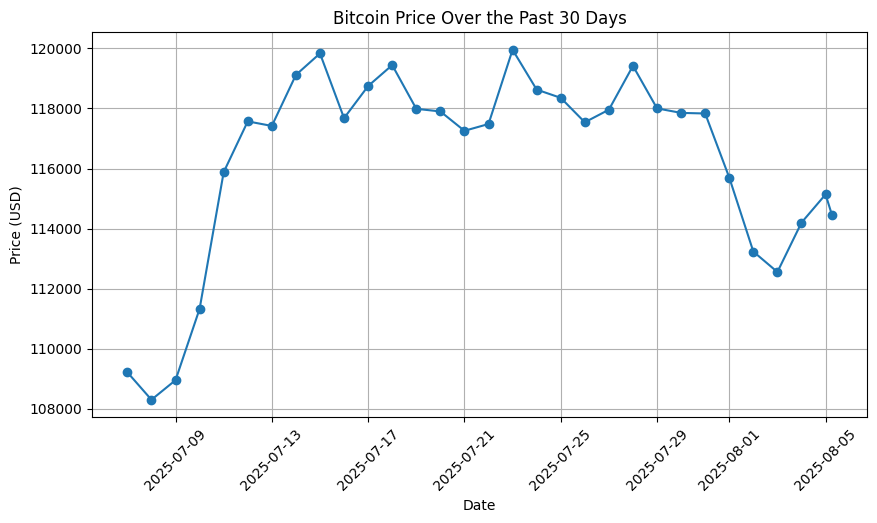

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['price'], marker='o', linestyle='-')
plt.title("Bitcoin Price Over the Past 30 Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)

# Save to jpeg for textbook publication
plt.savefig('Bitcoin Price Over the Past 30 Days.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

plt.show()


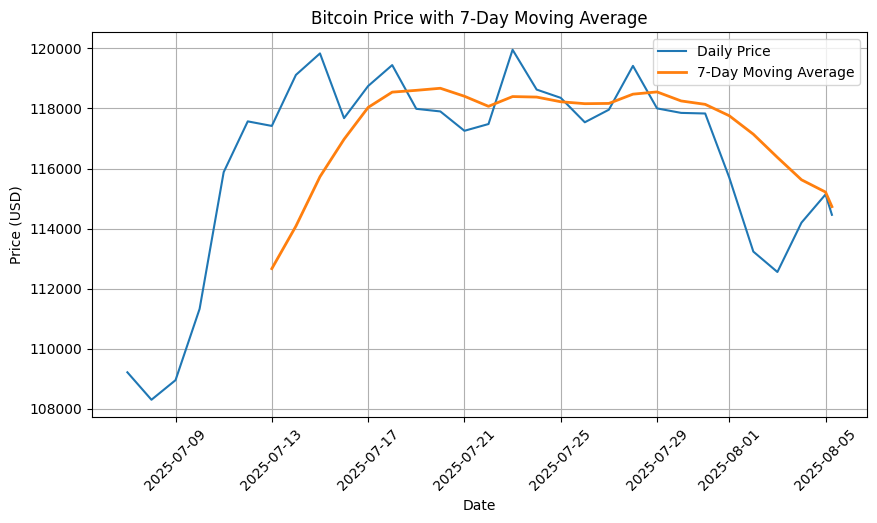

In [5]:
# Calculate moving average
df['7_day_MA'] = df['price'].rolling(window=7).mean()

# Plot original and moving average
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['price'], label="Daily Price")
plt.plot(df.index, df['7_day_MA'], label="7-Day Moving Average", linewidth=2)
plt.title("Bitcoin Price with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Save to jpeg for textbook publication
plt.savefig('Bitcoin Price with 7-Day Moving Average.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

plt.show()


# Your Project

In [6]:
# Import the necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Retrieve Ethereum Data for 90 days

# Define the API endpoint and parameters
api_url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart"
params = {
    "vs_currency": "usd",
    "days": "90",
    "interval": "daily"
}

# Send a request to the API
response = requests.get(api_url, params=params)

# Check if the request was successful and retrieve the JSON data
if response.status_code == 200:
    data = response.json()
    print("Data successfully retrieved!")
else:
    print("Failed to retrieve data:", response.status_code)


Data successfully retrieved!


In [8]:
# Convert the JSON Data to a Pandas DataFrame

# Extract the 'prices' data from the JSON response
prices = data['prices']

# Create a DataFrame with 'timestamp' and 'price' columns
df = pd.DataFrame(prices, columns=["timestamp", "price"])

# Convert timestamp from milliseconds to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the date as the DataFrame index
df.set_index('date', inplace=True)

# Drop the 'timestamp' column
df.drop('timestamp', axis=1, inplace=True)

# Display the first few rows to confirm
print(df.head())

print(df.describe())


                  price
date                   
2025-05-08  1810.316927
2025-05-09  2197.561189
2025-05-10  2341.407963
2025-05-11  2583.682905
2025-05-12  2507.469311
             price
count    91.000000
mean   2813.081702
std     498.611293
min    1810.316927
25%    2512.111523
50%    2574.067718
75%    2993.222601
max    3864.124837


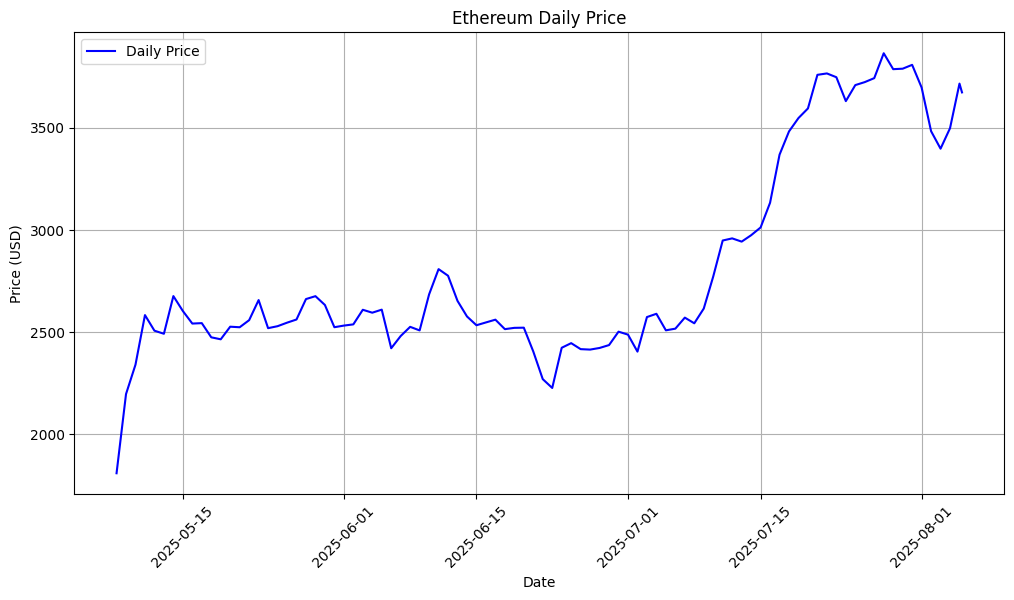

In [9]:
# Plot the Ethereum Price

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], color='blue', label='Daily Price')
plt.title("Ethereum Daily Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


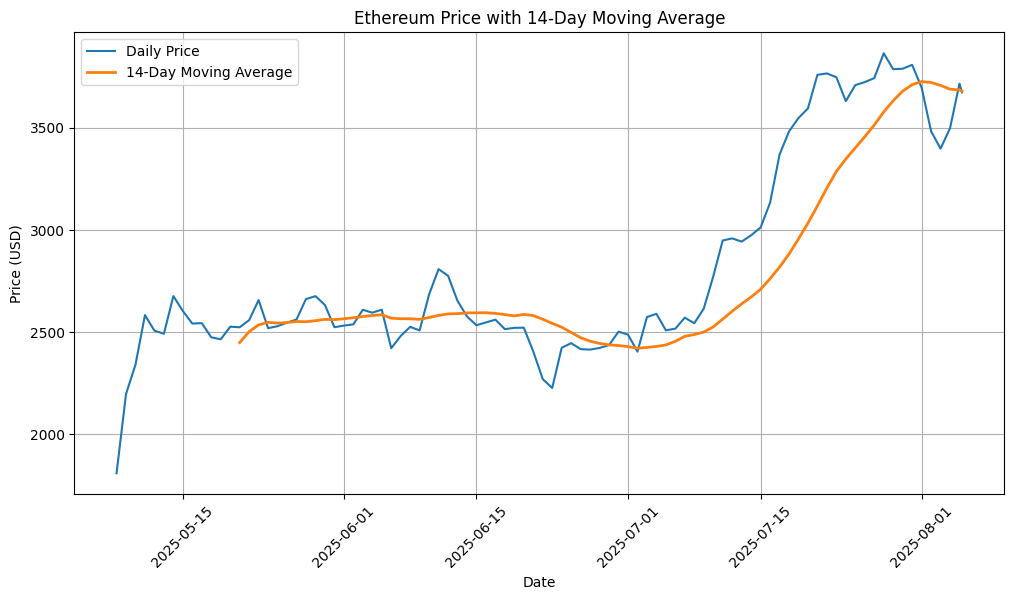

In [10]:
# Calculate the 14-day moving average
df['14_day_MA'] = df['price'].rolling(window=14).mean()

# Plot the daily price and the 14-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label="Daily Price")
plt.plot(df.index, df['14_day_MA'], label="14-Day Moving Average", linewidth=2)
plt.title("Ethereum Price with 14-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
